## `Import libs`

In [49]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split

# ML 
from sklearn.linear_model import LinearRegression

# Matrics
from sklearn.metrics import mean_absolute_error as MAE

## `Load Dataset`

In [5]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

print("Data imported successfully")

Data imported successfully


In [6]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## `Explore Dataset`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.duplicated().sum()

0

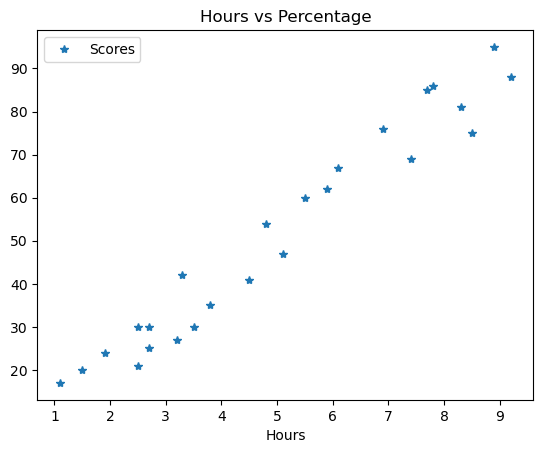

In [18]:
df.plot('Hours', 'Scores', style='*')
plt.title('Hours vs Percentage')
plt.show()

## `Splitting Data `

In [23]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [25]:
print('X_train shape is :', X_train.shape)
print('X_test shape is :', X_test.shape)
print('y_train shape is :', y_train.shape)
print('y_test shape is :', y_test.shape)

X_train shape is : (20, 1)
X_test shape is : (5, 1)
y_train shape is : (20,)
y_test shape is : (5,)


Text(0.5, 1.0, 'Plotting the regression line')

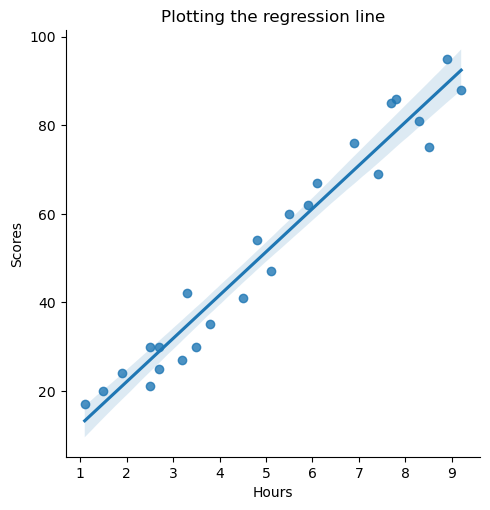

In [43]:
sns.lmplot(x="Hours",y="Scores", data=df)
plt.title("Plotting the regression line")

## `Building our model`

In [26]:
LR = LinearRegression()

In [27]:
LR.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = LR.predict(X_test) # Predicting the scores

### Visualize model on Training data

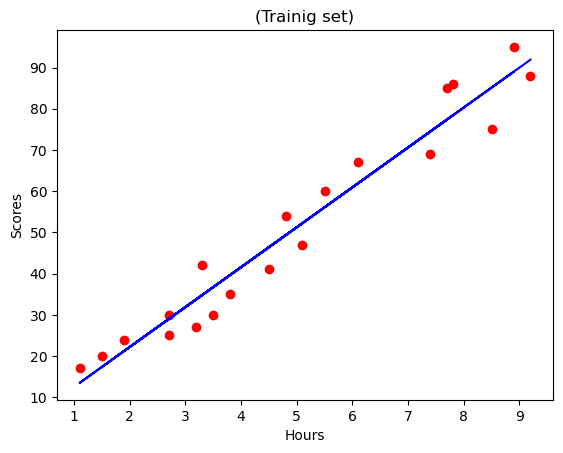

In [45]:
# vis Training data
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,LR.predict(X_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## visualize model on Test data

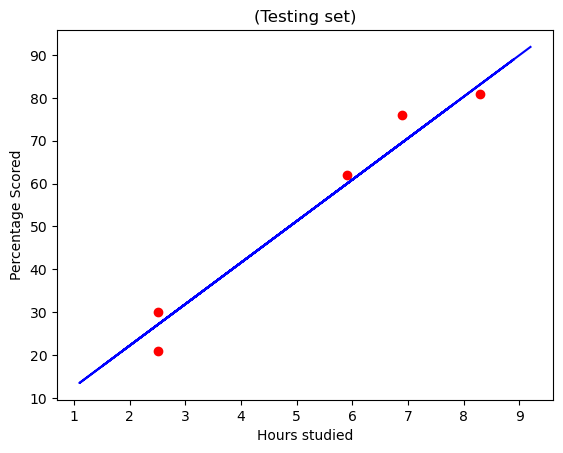

In [46]:
# Vis test data
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, LR.predict(X_train), color = 'blue')
plt.title('(Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

## `Compair Actual values with the Prediction`

In [31]:
new_df = pd.DataFrame({'Actual': y_test,
                      'prediction' : y_pred})

In [32]:
new_df

,Actual,prediction
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


## `Test The model with 9.25 hours`

In [47]:
## task 
Hours = np.array([[9.25]])
predict=LR.predict(Hours)
print("No of Hours = ",Hours)
print("Predicted Score = ",predict[0])

No of Hours =  [[9.25]]
Predicted Score =  92.38611528261494


## `Evaluate the model`

In [50]:
print('Mean Absolute Error:', MAE(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244
